# Local Join Counts
There are several versions of the LJC:

- univariate LJC

- bivariate LJC (case 1)

- bivariate LJC (case 2)

- multivariate LJC

https://pysal.org/esda/notebooks/localjoincounts.html

### Univariate LJC
Describes the count of the neighbors, of a given unit, that are equal to 1 when the unit is also equal to 1.  When a given unit is equal to 0, the statistic also becomes 0.

In [2]:
import libpysal
import geopandas as gpd
guerry = libpysal.examples.load_example('Guerry')
guerry_ds = gpd.read_file(guerry.get_path('guerry.shp'))
#Make guess_ds binary with threshold
guerry_ds['SELECTED'] = 0
guerry_ds.loc[(guerry_ds['Donatns'] > 10997), 'SELECTED'] = 1


c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:199: N

In [3]:
w = libpysal.weights.Queen.from_dataframe(guerry_ds)

In [4]:
from esda.join_counts_local import Join_Counts_Local
LJC_uni = Join_Counts_Local(connectivity = w).fit(guerry_ds['SELECTED'])

#### Each value in the array corresponds to a specific observation (row) in 'guerry_ds' DataFrame.
A value of 0 indidates that the corresponding observation is missing.

A value of greater than 0 indicates that the corresponding observation is not missing. The value itself represents the number of neighbors with similar 'SELECTED' values which are ['Donatns'] > 10997.

In [5]:
LJC_uni.LJC

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 3., 3., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 2., 0., 3., 0., 0.])

Small p-values (typically less than a significance level like 0.05) suggest that the observed local join count statistic is statistically significant, indicating the presence of spatial clustering or spatial autocorrelation in the 'SELECTED' attribute values.

Large p-values suggest that the observed local join count statistic is not statistically significant, and there is no strong evidence of spatial clustering or spatial autocorrelation in the 'SELECTED' attribute values.

#### Only three areas are less than 0.05

In [6]:
LJC_uni.p_sim

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan, 0.444,   nan, 0.024, 0.024,   nan, 0.299,
         nan,   nan,   nan,   nan,   nan,   nan, 0.304,   nan, 0.31 ,
         nan,   nan,   nan,   nan,   nan,   nan, 0.308,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan, 0.477,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan, 0.036,   nan,   nan,   nan,   nan,   nan, 0.132,
         nan, 0.048,   nan,   nan])

In [7]:
guerry_ds['LJC_UNI'] = LJC_uni.LJC
guerry_ds['LJC_UNI_p_sim'] = LJC_uni.p_sim

<Axes: >

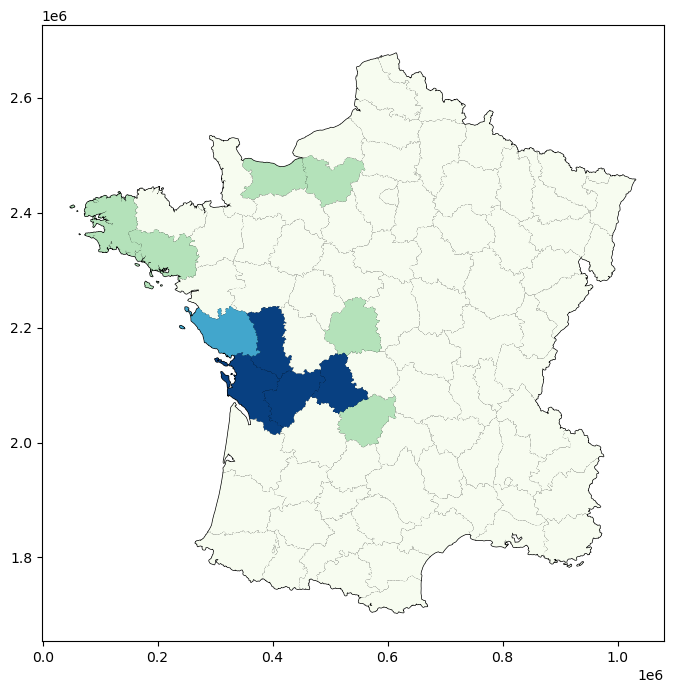

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'aspect': 'equal'})
guerry_ds.plot(color='white', edgecolor='black', ax=ax)
guerry_ds.plot(column='LJC_UNI',categorical=True, cmap='GnBu', ax=ax)

### mapping the accompanying significance values below a certain threshold with p-values

As I already know, the only theree areas will be displayed in the plot.

<Axes: >

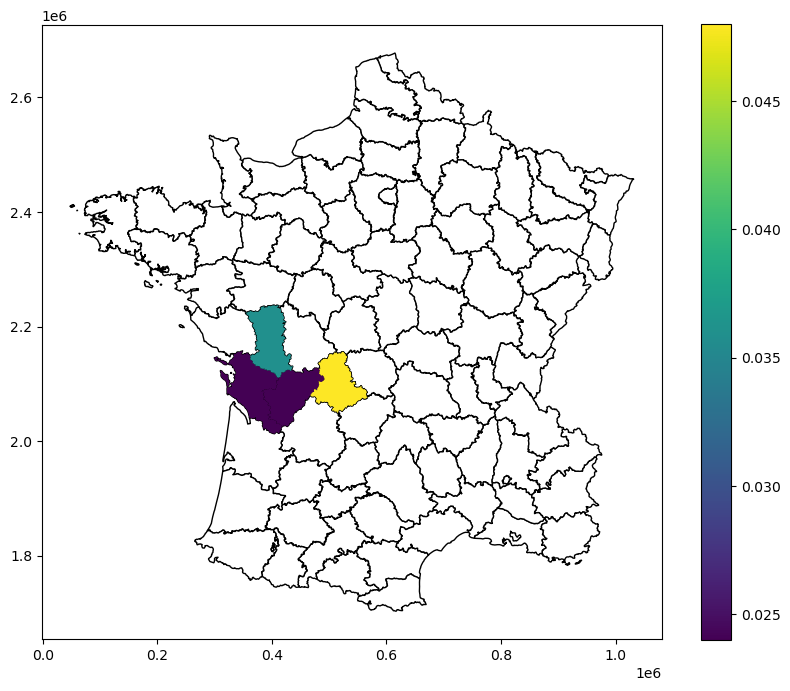

In [9]:
import numpy
#add a column which is nan values
guerry_ds['LJC_UNI_p_sim_sig'] = numpy.nan
#put the values which are less than 0.05 from 'LJC_UNI_p_sim' into the new column
#.loc assigns values from ['LJC_UNI_p_sim'] which are less than 0.05 to the new column(df)
guerry_ds.loc[(guerry_ds['LJC_UNI_p_sim'] <= 0.05), 'LJC_UNI_p_sim_sig'] = guerry_ds['LJC_UNI_p_sim']

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,8), subplot_kw={'aspect':'equal'})
guerry_ds.plot(color='white', edgecolor='black', ax=ax)
guerry_ds.plot(column='LJC_UNI_p_sim_sig',
               legend=True, ax=ax)

<Axes: >

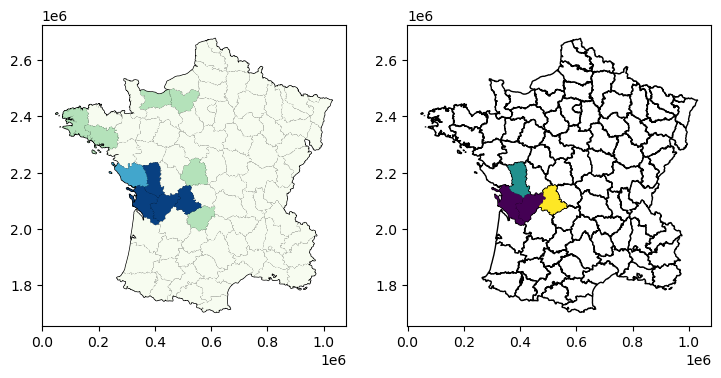

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(2.16*4,4))
guerry_ds.plot(color='white', edgecolor='black', ax=ax[0])
guerry_ds.plot(column='LJC_UNI',categorical=True, cmap='GnBu', ax=ax[0])
guerry_ds.plot(color='white', edgecolor='black', ax=ax[1])
guerry_ds.plot(column='LJC_UNI_p_sim_sig', ax=ax[1])

## Bivariate LJC Case 1
Considering two variables, let's say X and Y.

No in-situ co-location, or where xi and zi not take the same value at i or j. (xi=xj=1) as well as (xj=0).

More specifically, in BJC Case 1, the focus is on assessing whether certain attribute combinations (00, 01, 10, 11) are spatially clustered or dispersed. It considers both the presence and absence of attributes in the neighboring spatial units.

A bivariate LJC value of 1 indicates that there is one neighboring spatial unit with a similar pattern for both variables. 

![Alt text](image-1.png)

In [11]:
import libpysal
import geopandas as gpd
commpop = gpd.read_file("https://github.com/jeffcsauer/GSOC2020/raw/master/validation/data/commpop.gpkg")

In [12]:
commpop.head()

,POLY_ID,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,JC_Case1,NN_Case1,PP_VAL_Case1,geometry
0,1,DOUGLAS,35.0,18238.0,26470.0,-8232.0,-31.099358,0.0,1.0,2,4,0.213,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,2,OAKLAND,36.0,5918.0,6110.0,-192.0,-3.142390,0.0,1.0,0,3,NaN,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,3,FULLER PARK,37.0,2876.0,3420.0,-544.0,-15.906433,0.0,1.0,1,6,0.200,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,4,GRAND BOULEVARD,38.0,21929.0,28006.0,-6077.0,-21.698922,0.0,1.0,1,7,0.156,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,5,KENWOOD,39.0,17841.0,18363.0,-522.0,-2.842673,0.0,1.0,0,4,NaN,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [13]:
w = libpysal.weights.Queen.from_dataframe(commpop)

c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: UserWarning: Geometry is in a geographic CRS. Results from 'centroid'

(<Figure size 640x480 with 1 Axes>, <Axes: >)

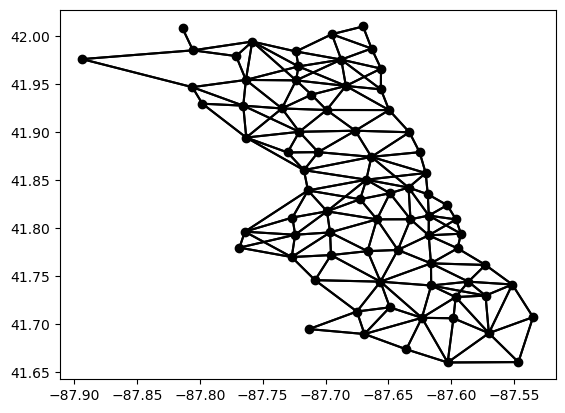

In [14]:
w.plot(commpop)

Since I am considering two variables this time, I will need to use two variables to fit the analysis to the two variables. I will also need to specify the case for bivariate joint counts analysis abbreviated as 'BJC'.

.fit(commpop['popneg'], commpop['popplus'], case='BJC'): Fits the analysis to the 'popneg' and 'popplus' variables from the 'commpop' dataset using the specified case 'BJC'. This case refers to the bivariate joint counts analysis.

popplus	Binary variable (1 if a positive population change is observed between 2000 and 2010)

popneg	Binary variable (1 if a negative population change is observed between 2000 and 2010)

In [15]:
from esda.join_counts_local_bv import Join_Counts_Local_BV
LJC_BV_Case1 = Join_Counts_Local_BV(connectivity=w).fit(commpop['popneg'], commpop['popplus'], case='BJC')

In [16]:
commpop['LJC_BV_Case1'] = LJC_BV_Case1.LJC
commpop['LJC_BV_Case1']

0     2.0
1     0.0
2     1.0
3     1.0
4     0.0
     ... 
72    0.0
73    1.0
74    0.0
75    0.0
76    0.0
Name: LJC_BV_Case1, Length: 77, dtype: float64

In [44]:
total = sum(commpop['LJC_BV_Case1'] >= 1)
total

28

In [17]:
commpop['LJC_BV_Case1_p_sim'] = LJC_BV_Case1.p_sim
commpop['LJC_BV_Case1_p_sim']

0     0.227
1       NaN
2     0.202
3     0.155
4       NaN
      ...  
72      NaN
73    0.274
74      NaN
75      NaN
76      NaN
Name: LJC_BV_Case1_p_sim, Length: 77, dtype: float64

Only two areas are less than 0.05 
And again, those areas indicate that there is significant variation in the data and presence of spatial autocorrelation.

In [21]:
total = sum(commpop['LJC_BV_Case1_p_sim'] < 0.05)
total

2

In [19]:
commpop['LJC_BV_Case1_p_sim_sig'] = numpy.nan
commpop.loc[(commpop['LJC_BV_Case1_p_sim'] <= 0.05), 'LJC_BV_Case1_p_sim_sig'] = commpop['LJC_BV_Case1_p_sim']


Text(0.5, 1.0, 'P-value')

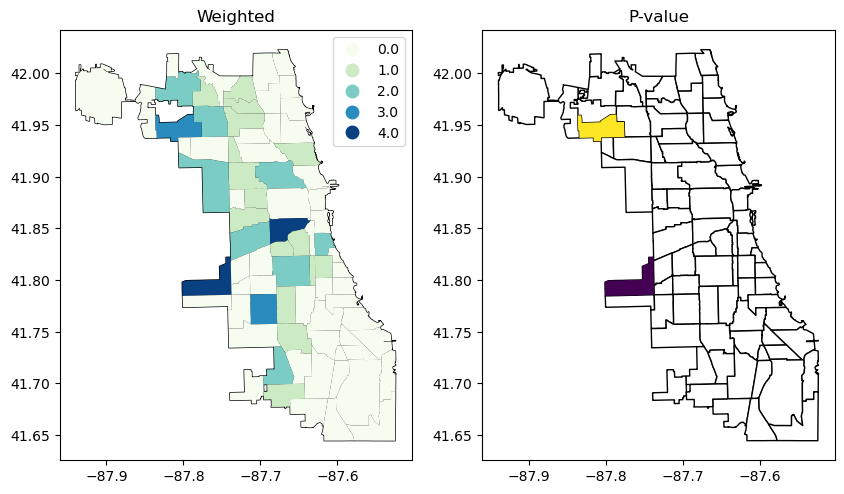

In [20]:

fig, ax = plt.subplots(1, 2, figsize=(10, 8))
commpop.plot(color = 'white', edgecolor = 'black', ax=ax[0])
commpop.plot(column = 'LJC_BV_Case1', cmap = 'GnBu', categorical =True, legend = True, ax=ax[0])
commpop.plot(color = 'white', edgecolor = 'black', ax=ax[1])
commpop.plot(column = 'LJC_BV_Case1_p_sim_sig', ax=ax[1])
ax[0].set_title('Weighted')
ax[1].set_title('P-value')

## Bivariate LJC Case 2
Identifying areas with co-location (xi=zi-1) and (xj=zj=1)

In BJC Case 2, the focus is on assessing the clustering or dispersion of 'presence-absence' pairs (1A and 1B).

It considers only pairs where one unit has the attribute (presence) while the other unit does not (absence), or vice versa.

![Alt text](image.png)
Conditional Join Counts

I'm going to use the Guerry dataset again.

In [22]:
guerry = libpysal.examples.load_example('Guerry')
guerry_ds = gpd.read_file(guerry.get_path('guerry.shp'))
guerry_ds['infq5'] = 0
guerry_ds['donq5'] = 0
guerry_ds.loc[(guerry_ds['Infants'] > 23574), 'infq5'] = 1
guerry_ds.loc[(guerry_ds['Donatns'] > 10973), 'donq5'] = 1

Created two columns called, 'infq5' and 'donq5' in the input file and set the conditions for the each column. (can be seen below)

In [23]:
guerry_ds.head()

,dept,Region,Dprtmnt,Crm_prs,Crm_prp,Litercy,Donatns,Infants,Suicids,MainCty,...,Lottery,Desertn,Instrct,Prsttts,Distanc,Area,Pop1831,geometry,infq5,donq5
0,1.0,E,Ain,28870.0,15890.0,37.0,5098.0,33120.0,35039.0,2.0,...,41.0,55.0,46.0,13.0,218.372,5762.0,346.03,"POLYGON ((801150.000 2092615.000, 800669.000 2...",1,0
1,2.0,N,Aisne,26226.0,5521.0,51.0,8901.0,14572.0,12831.0,2.0,...,38.0,82.0,24.0,327.0,65.945,7369.0,513.00,"POLYGON ((729326.000 2521619.000, 729320.000 2...",0,0
2,3.0,C,Allier,26747.0,7925.0,13.0,10973.0,17044.0,114121.0,2.0,...,66.0,16.0,85.0,34.0,161.927,7340.0,298.26,"POLYGON ((710830.000 2137350.000, 711746.000 2...",0,0
3,4.0,E,Basses-Alpes,12935.0,7289.0,46.0,2733.0,23018.0,14238.0,1.0,...,80.0,32.0,29.0,2.0,351.399,6925.0,155.90,"POLYGON ((882701.000 1920024.000, 882408.000 1...",0,0
4,5.0,E,Hautes-Alpes,17488.0,8174.0,69.0,6962.0,23076.0,16171.0,1.0,...,79.0,35.0,7.0,1.0,320.280,5549.0,129.10,"POLYGON ((886504.000 1922890.000, 885733.000 1...",0,0


In [24]:
w = libpysal.weights.Queen.from_dataframe(guerry_ds)

c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neig

(<Figure size 640x480 with 1 Axes>, <Axes: >)

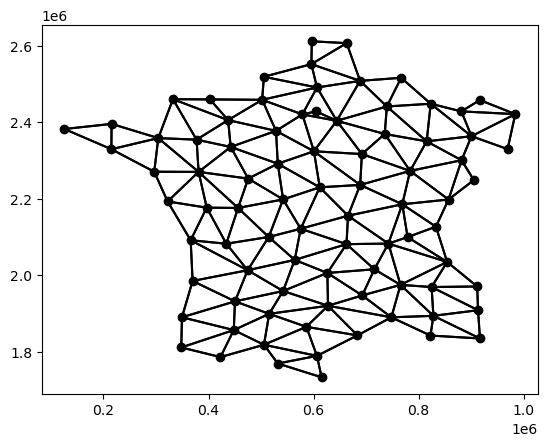

In [25]:
w.plot(guerry_ds)

Similarly, I put two columns since I want to use two variables but I used 'CLC' for case this time.

In [26]:
LJC_BV_Case2 = Join_Counts_Local_BV(connectivity=w).fit(guerry_ds['infq5'], guerry_ds['donq5'], case='CLC')

In [29]:
guerry_ds['LJC_BV_Case2'] = LJC_BV_Case2.LJC
guerry_ds['LJC_BV_Case2_p_sim'] = LJC_BV_Case2.p_sim

In [30]:
guerry_ds.head()

,dept,Region,Dprtmnt,Crm_prs,Crm_prp,Litercy,Donatns,Infants,Suicids,MainCty,...,Instrct,Prsttts,Distanc,Area,Pop1831,geometry,infq5,donq5,LJC_BV_Case2,LJC_BV_Case2_p_sim
0,1.0,E,Ain,28870.0,15890.0,37.0,5098.0,33120.0,35039.0,2.0,...,46.0,13.0,218.372,5762.0,346.03,"POLYGON ((801150.000 2092615.000, 800669.000 2...",1,0,0.0,NaN
1,2.0,N,Aisne,26226.0,5521.0,51.0,8901.0,14572.0,12831.0,2.0,...,24.0,327.0,65.945,7369.0,513.00,"POLYGON ((729326.000 2521619.000, 729320.000 2...",0,0,0.0,NaN
2,3.0,C,Allier,26747.0,7925.0,13.0,10973.0,17044.0,114121.0,2.0,...,85.0,34.0,161.927,7340.0,298.26,"POLYGON ((710830.000 2137350.000, 711746.000 2...",0,0,0.0,NaN
3,4.0,E,Basses-Alpes,12935.0,7289.0,46.0,2733.0,23018.0,14238.0,1.0,...,29.0,2.0,351.399,6925.0,155.90,"POLYGON ((882701.000 1920024.000, 882408.000 1...",0,0,0.0,NaN
4,5.0,E,Hautes-Alpes,17488.0,8174.0,69.0,6962.0,23076.0,16171.0,1.0,...,7.0,1.0,320.280,5549.0,129.10,"POLYGON ((886504.000 1922890.000, 885733.000 1...",0,0,0.0,NaN


In [42]:
total2 = sum(guerry_ds['LJC_BV_Case2'] >= 1)

In [43]:
total2

5

<Axes: >

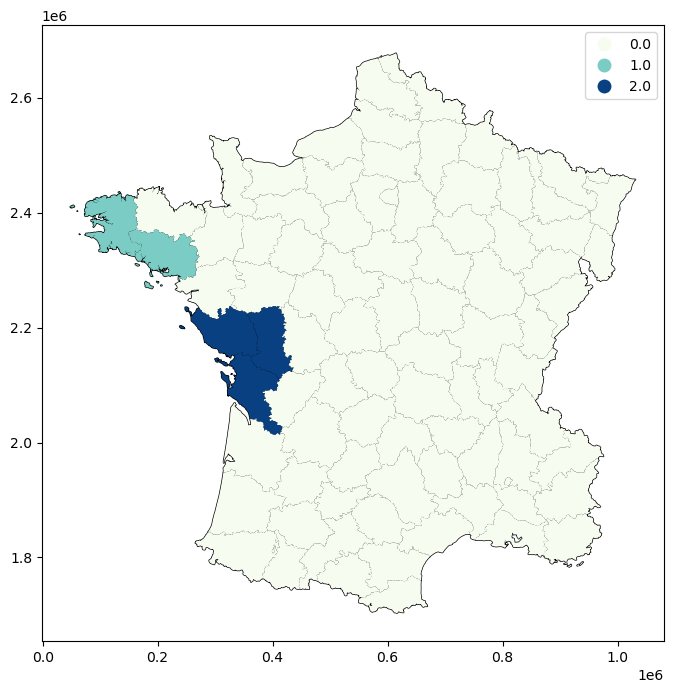

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
guerry_ds.plot(color='white', edgecolor = 'black', ax=ax)
guerry_ds.plot(column = 'LJC_BV_Case2', cmap = 'GnBu', categorical = True, legend = True, ax=ax)

### As can be seen in the example above, five areas are filled which means that two variables are 'presence-absence' pairs.  
The "1" represents pairs of neighboring spatial units where one unit has the attribute (presence) while the other unit does not have the attribute (absence), or vice versa.

The "2" represents pairs of neighboring spatial units where both units have the attribute (presence).



### Multivariate
Rather than considering two variables x and z, the multivariate statistic consdiers variables at each location i. All  variables must then meet the co-location criterion of equalling 1. Formally:
![Alt text](image-2.png)

This time, I'm gonna use three variables and use MV

In [45]:
guerry = libpysal.examples.load_example('Guerry')
guerry_ds = gpd.read_file(guerry.get_path('guerry.shp'))
guerry_ds['infq5'] = 0
guerry_ds['donq5'] = 0
guerry_ds['suic5'] = 0
guerry_ds.loc[(guerry_ds['Infants'] > 23574), 'infq5'] = 1
guerry_ds.loc[(guerry_ds['Donatns'] > 10973), 'donq5'] = 1
guerry_ds.loc[(guerry_ds['Suicids'] > 55564), 'suic5'] = 1

In [46]:
w = libpysal.weights.Queen.from_dataframe(guerry_ds)

In [47]:
from esda.join_counts_local_mv import Join_Counts_Local_MV
LJC_MV = Join_Counts_Local_MV(connectivity=w).fit([guerry_ds['infq5'], guerry_ds['donq5'], guerry_ds['suic5']])

Before proceeding to mapping, it is worthwhile to check if there are any areas that meet the criterion described above.


In [48]:
LJC_MV.LJC

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
LJC_MV.p_sim

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

Because there are no areas that meet the criteria, no areas will have a significance value.
Nevertheless, it is important to recognize tht such a finding may still be important as a ‘null’ result!